In [1]:
# Import workflow elements
from nipype import Node, Workflow

In [2]:
# Import necessary interfaces
from nipype.interfaces import fsl, afni

In [7]:
#Define workflow and create nodes
wf = Workflow(name="group1_pre_process")
wf.base_dir = 'group1_results'

#Skullstrip
node_skull_strip = Node(fsl.BET(mask=True), name='bet')

#FLIRT
node_volreg = Node(fsl.MCFLIRT(), name='volreg')

#Volreg AFNI
#node_afni_volreg = Node(afni.Volreg(), name='volreg_afni')



In [8]:
#Connet nodes
wf.connect(node_skull_strip, 'out_file', node_volreg,'in_file')
#wf.connect(node_skull_strip, 'out_file', node_afni_volreg,'in_file')

In [9]:
wf.inputs.bet.in_file = "/home/jovyan/work/data/ds000114/sub-01/func/sub-01_task-linebisection_bold.nii.gz"
wf.run()

170329-15:10:21,448 workflow INFO:
	 Workflow group1_pre_process settings: ['check', 'execution', 'logging']
170329-15:10:21,456 workflow INFO:
	 Running serially.
170329-15:10:21,459 workflow INFO:
	 Executing node bet in dir: /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/group1_results/group1_pre_process/bet
170329-15:10:21,462 workflow INFO:
170329-15:10:21,466 workflow INFO:
	 Executing node volreg in dir: /home/jovyan/work/workshops/170327-nipype/notebooks/rfmri_group_1/group1_results/group1_pre_process/volreg
170329-15:10:21,469 workflow INFO:


170329-15:10:22,662 workflow INFO:
	 Generated workflow graph: group1_results/group1_pre_process/graph.dot.png (graph2use=hierarchical, simple_form=True).


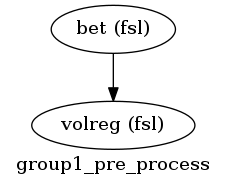

In [10]:
from IPython.display import Image
Image(wf.write_graph())